# Oscillateurs couplés

Dans cette série nous allons étudier les équations suivantes:
\begin{align*}
  \dot q_1(t)&=p_1(t)\\
  \dot q_2(t)&=p_2(t)\\
  \dot p_1(t)&=-k_1q_1(t)-\lambda(q_1(t)-q_2(t))\\
  \dot p_2(t)&=-k_2q_2(t)+\lambda(q_1(t)-q_2(t))
\end{align*}


## Intégration en C++

Reprendre le programme C++ de la série 1 et le modifier comme suit:

 * utiliser un vecteur de coordonnées $(q_1,p_1,q_2,p_2)$
 * lire les paramètres en ligne de commande pour choisir $k_1$, $k_2$, $\lambda$ et le nom du fichier de sortie
 * écrire deux fonctions: pour la méthode d'Euler et celle de Störmer-Verlet 

Le fichier de sortie doit contenir les variables $t,q_1,p_1,q_2,p_2$, une ligne par pas de temps.

## Conservation de l'énergie

Choisir une condition initiale $(q_1(0),p_1(0),q_2(0),p_2(0))$ et des paramètres $\lambda>0$, $k_1\neq k_2$ raisonnables et executer deux simulations pour $t\in[0,50]$: une pour chaque méthode d'intégration (2 fichiers de sortie: **output_verlet.txt**, **output_euler.txt**).

En python: calculer l'énergie du système à chaque pas de temps:
$$
H(q_1,q_2,p_1,p_2)=\frac 12 \Bigl(p_1^2+p_2^2+k_1q_1^2+k_2q_2^2+\lambda(q_1-q_2)^2\Bigr)
$$
Représenter $H(t)$ en fonction de $t$ pour les 2 simulations. 

Laquelle des deux méthodes est préférable?

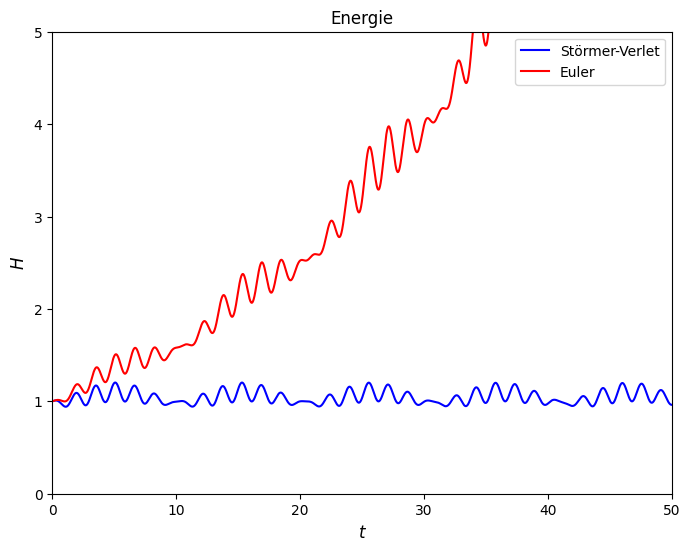

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tqpV = np.loadtxt("output_verlet.txt")
tqpE = np.loadtxt("output_euler.txt")
tt = tqpV[:,0]
icols = np.arange(1, tqpV.shape[1], 2)
qq = tqpV[:,icols]
pp = tqpV[:,icols+1]
lbda = 1
k = np.array([1,4])
HV = 0.5*(np.sum(pp**2,1)+np.sum(k*qq**2,1)+lbda*(qq[:,0]-qq[:,1])**2)
qq = tqpE[:,icols]
pp = tqpE[:,icols+1]
HE = 0.5*(np.sum(pp**2,1)+np.sum(k*qq**2,1)+lbda*(qq[:,0]-qq[:,1])**2)

fig, ax = plt.subplots(figsize=(8,6))

ax.set_title("Energie")
plt.axis([0,50,0,5])
ax.set_ylabel("$H$", fontsize=12)
ax.set_xlabel("$t$", fontsize=12)
ax.plot(tt, HV, 'b-', label='Störmer-Verlet')
ax.plot(tt, HE, 'r-', label='Euler')
ax.legend()

plt.show()

# Trajectoires sur le tore

Générer des simulations pour $t\in[0,100]$, par la méthode de Störmer-Verlet pour chacune des combinaisons de paramètres dans le tableau ci-dessous:

|$$k_1$$|$$k_2$$|$$\lambda$$|
|--|--|--|
|1|2|0|
|1|4|0|
|4|9|0|
|1|2|1|
|1|4|1|
|4|9|1|
|1|2|10|
|1|4|10|
|4|9|10|

En Python: calculer les variables d'angle (fonction [arctan2](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html) de numpy)
$$
\theta_1=-\arctan(\frac{p_1}{\sqrt{k_1}q_1})\qquad
\theta_2=-\arctan(\frac{p_2}{(\sqrt{k_2}q_2})
$$
et représenter $\theta_1$ en fonction de $\theta_2$. 

Faire un dessin pour chaque simulation effectuée.

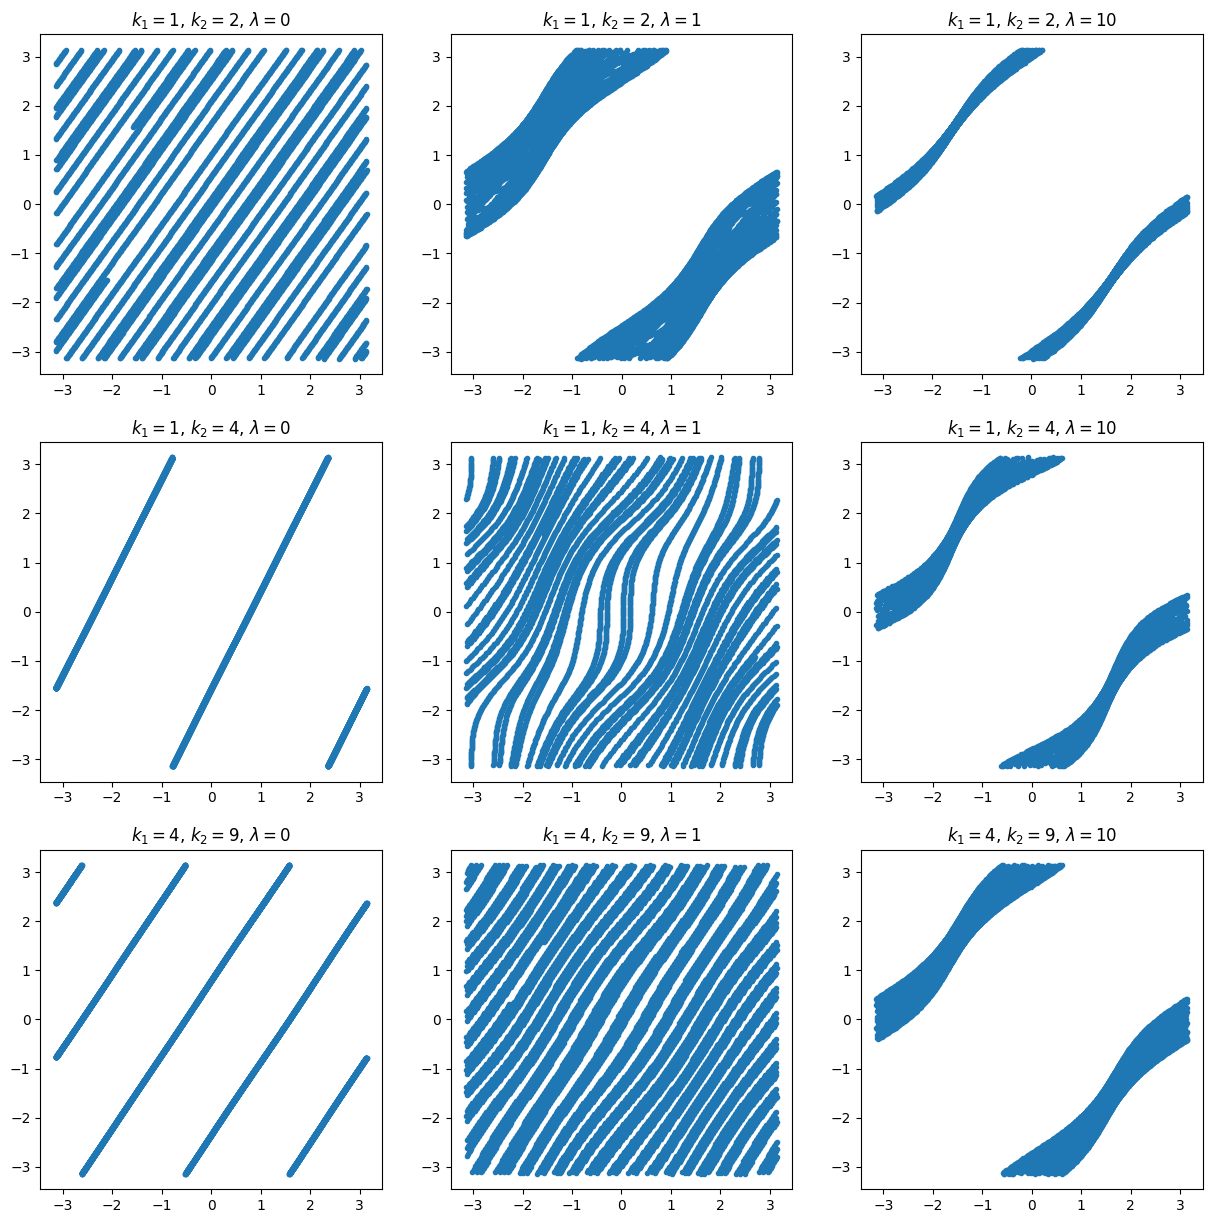

In [2]:
nx = 3
ny = 3
fig, axs = plt.subplots(nx,ny, figsize=(nx*5,ny*5))

params = np.array([[1,2,0],[1,2,1],[1,2,10],
                   [1,4,0],[1,4,1],[1,4,10],
                   [4,9,0],[4,9,1],[4,9,10]])
pn = 0
for n in range(nx):
    for m in range(ny):
        k1,k2,lbda = params[pn,:]
        tqp = np.loadtxt(f"output{k1}{k2}{lbda}.txt")
        theta1 = -np.arctan2(tqp[:,2], np.sqrt(k1)*tqp[:,1])
        theta2 = -np.arctan2(tqp[:,4], np.sqrt(k2)*tqp[:,3])
        axs[n,m].set_title(f"$k_1=${k1}, $k_2=${k2}, $\lambda=${lbda}")
        axs[n,m].plot(theta1,theta2, '.')
        pn += 1


plt.show()